<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/Summarization_Hugging_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install -U sentencepiece
!pip install --upgrade urllib3
!pip install py7zr

In [42]:
from datasets import load_dataset
dataset=load_dataset("abisee/cnn_dailymail", "3.0.0")

In [43]:
dataset

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [44]:
dataset['train'][1]['article'][:300]

'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many men'

In [45]:
dataset['train'][1]['highlights']

'Mentally ill inmates in Miami are housed on the "forgotten floor"\nJudge Steven Leifman says most are there as a result of "avoidable felonies"\nWhile CNN tours facility, patient shouts: "I am the son of the president"\nLeifman says the system is unjust and he\'s fighting for change .'

In [46]:
#We will be usinf models like GPT2,T5,BART,PEGASUS

In [47]:
from transformers import pipeline
pipe=pipeline("text-generation",model="gpt2-medium")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [48]:
#let us text summarize
input_text=dataset['train'][1]['article'][:2000]

In [49]:
query=input_text+"\nTL;DR:\n"
pipe_out=pipe(query,max_length=512,clean_up_tokenization_spaces=True,truncation=True)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [50]:
pipe_out[0]['generated_text']

'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most severe mental illnesses are incarcerated until they\'re ready to appear in court. Most often, they face drug charges or charges of assaulting an officer --charges that Judge Steven Leifman says are usually "avoidable felonies." He says the arrests often result from confrontations with police. Mentally ill people often won\'t do what they\'re told when police arrive on the scene -- confrontation seems to exacerbate their illness and they become more paranoid, delusional, and less likely to foll

In [51]:
pipe_out[0]['generated_text'][len(query):]

'- Inside the Miami-Dade County jail, mentally ill people are confined on the ninth floor for months, then sentenced for crimes they\'ve no control over.\n- At some point, most people who have a mental disease end up in jail.\nAnd what\'s happening? The Miami Herald\'s story explains "I know this because people have been detained there for years. Those who'

In [52]:
summaries={}
summaries['gpt2-medium-380M']=pipe_out[0]['generated_text'][len(query):]

In [53]:
#T5 transformers
pipe=pipeline('summarization',model='t5-base')

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [54]:
pipe_out=pipe(input_text)

In [55]:
summaries['t5-base-223M']=pipe_out[0]['summary_text']

In [56]:
#BART
# pipe=pipeline('summarization',model='facebook/bart-large-cnn')

In [57]:
pipe_out=pipe(input_text)

In [58]:
summaries['bart-large-cnn-400M']=pipe_out[0]['summary_text']

In [59]:
# PEGASUS model
# pipe=pipeline('summarization',model='google/pegasus-cnn_dailymail')

In [60]:
pipe_out=pipe(input_text)

In [61]:
summaries['pegasus-cn-568M']=pipe_out[0]['summary_text']

In [62]:
for model in summaries:
  print(model.upper())
  print(summaries[model])
  print("")

GPT2-MEDIUM-380M
- Inside the Miami-Dade County jail, mentally ill people are confined on the ninth floor for months, then sentenced for crimes they've no control over.
- At some point, most people who have a mental disease end up in jail.
And what's happening? The Miami Herald's story explains "I know this because people have been detained there for years. Those who

T5-BASE-223M
mentally ill inmates housed on the "forgotten floor" of a pretrial detention facility in florida . inmates with the most severe mental illnesses are incarcerated until they're ready to appear . a judge says the arrests often result from confrontations with police . mentally ill people often won't do what police say, judge says .

BART-LARGE-CNN-400M
mentally ill inmates housed on the "forgotten floor" of a pretrial detention facility in florida . inmates with the most severe mental illnesses are incarcerated until they're ready to appear . a judge says the arrests often result from confrontations with police 

In [64]:
from datasets import load_dataset
from transformers import pipeline
from transformers import AutoModelForSeq2SeqLM,AutoTokenizer
import torch

In [65]:
device='gpu'
model_ckpt='facebook/bart-large-cnn'
tokenizer=AutoTokenizer.from_pretrained(model_ckpt)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [66]:
model=AutoModelForSeq2SeqLM.from_pretrained(model_ckpt)

In [67]:
samsum=load_dataset('samsum')

The repository for samsum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/samsum.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

In [68]:
samsum['train'][0]

{'id': '13818513',
 'dialogue': "Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)",
 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.'}

In [69]:
dialogue_length=[len(x['dialogue'].split()) for x in samsum['train']]
summary_length=[len(x['summary'].split()) for x in samsum['train']]

In [70]:
import pandas as pd
data=pd.DataFrame([dialogue_length,summary_length]).T

In [71]:
data

,0,1
0,16,9
1,18,10
2,98,14
3,26,18
4,179,27
...,...,...
14727,56,16
14728,198,36
14729,142,22
14730,276,40


array([[<Axes: title={'center': 'Dialogue Length'}>,
        <Axes: title={'center': 'Summary length'}>]], dtype=object)

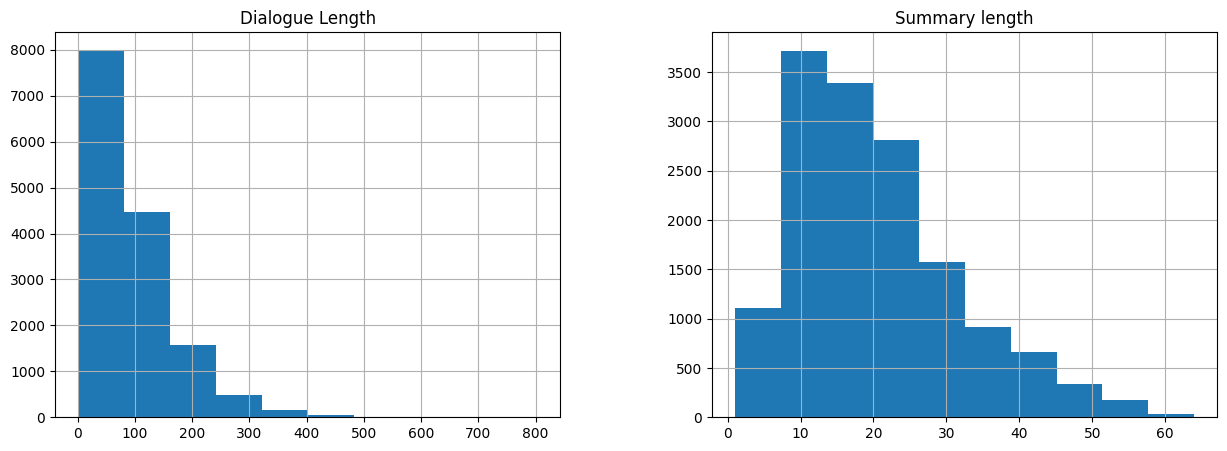

In [72]:
data.columns=['Dialogue Length','Summary length']
data.hist(figsize=(15,5))

In [78]:
#lets build datacollator
def get_feature(batch):
  inputs=tokenizer(batch['dialogue'],text_target=batch['summary'],max_length=1024,truncation=True)

  encodings={'input_ids': inputs['input_ids'],
             'attention_mask':inputs['attention_mask'],
             'labels':inputs['labels']
             }
  return encodings

In [79]:
samsum_pt=samsum.map(get_feature,batched=True)

Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

In [80]:
samsum_pt

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 818
    })
})

In [81]:
columns=['input_ids','attention_mask','labels']
samsum_pt.set_format(type='torch',columns=columns)

In [83]:
from transformers import DataCollatorForSeq2Seq
data_collator=DataCollatorForSeq2Seq(tokenizer,model=model)

In [87]:
from transformers import TrainingArguments,Trainer

training_args=TrainingArguments(
    output_dir='bart_samsum',
    num_train_epochs=1,
    warmup_steps=500,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    weight_decay=0.01,
    logging_steps=10,
    evaluation_strategy='steps',
    eval_steps=500,
    save_steps=1e6,
    gradient_accumulation_steps=16
    )

trainer=Trainer(model=model,args=training_args,tokenizer=tokenizer,data_collator=data_collator,train_dataset=samsum_pt['train'],eval_dataset=samsum_pt['validation'])

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [88]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/data/data_collator.py:656: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)


Step,Training Loss,Validation Loss


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


TrainOutput(global_step=230, training_loss=1.483029485785443, metrics={'train_runtime': 1842.3879, 'train_samples_per_second': 7.996, 'train_steps_per_second': 0.125, 'total_flos': 8823027777404928.0, 'train_loss': 1.483029485785443, 'epoch': 0.9991854466467553})

In [89]:
trainer.save_model('bart_samsum_model')

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


In [90]:
#custom dialogue prediction
pipe=pipeline('summarization',model='bart_samsum_model')
gen_kwargs={'length_penalty':0.8,'num_beams':8,'max_length':128}

custom_dialogue="""
PK:What work are you planning to give Prav?
SA:I was hoping to send him on a business trip first.
PK:cool. is there any suitable work for him?
SA:he did excellent in last quarter. i will assign new project once he is back.

"""

print(pipe(custom_dialogue,**gen_kwargs))

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Your max_length is set to 128, but your input_length is only 65. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=32)


[{'summary_text': 'SA wants to send Prav on a business trip first. He will assign him a new project once he is back. Prav did excellent work in last quarter and he will be sent new work to him.   Â. Â .  '}]


In [91]:
!zip bart_samsum.zip -r bart_samsum_model/

  adding: bart_samsum_model/ (stored 0%)
  adding: bart_samsum_model/merges.txt (deflated 53%)
  adding: bart_samsum_model/tokenizer.json (deflated 72%)
  adding: bart_samsum_model/tokenizer_config.json (deflated 75%)
  adding: bart_samsum_model/config.json (deflated 61%)
  adding: bart_samsum_model/vocab.json (deflated 59%)
  adding: bart_samsum_model/generation_config.json (deflated 48%)
  adding: bart_samsum_model/training_args.bin (deflated 51%)
  adding: bart_samsum_model/special_tokens_map.json (deflated 52%)
  adding: bart_samsum_model/model.safetensors


zip error: Interrupted (aborting)
